
### Zadanie 3

(2-3 min)

> 1. Napisać funkcję `func(x, y, c=0)` w Python, która odpowiada poniższej funkcji matematycznej:
> $$ f(x, y) = \frac{\sin\left(\sqrt{x^2 + y^2 + c^2}\right)}{\sqrt{x^2 + y^2 + c^2}} $$
> 2. Sprawdzić wartości funkcji w takich punktach:
>     - `func(x=1, y=1, c=0)` $\approx 0.698$
>     - `func(x=0, y=0, c=1)` $\approx 0.841$
> 3. Używając tej funkcji narysować wykres za pomocą jednego z podanych poniżej sposobów.

Podpowiedzi:
- funkcje `math.sin` oraz `math.sqrt` mogą się przydać; 
- podniesienie do kwadratu w Pythonie wygląda trochę nie tak, jak w innych językach.

Rozwiązanie:

In [1]:
import math


def func(x, y, c=0):
    sqrt_res = math.sqrt(x ** 2 + y ** 2 + c ** 2)
    return math.sin(sqrt_res) / sqrt_res

### Część wspólna dla obu implementacji

In [3]:
import numpy as np

c = 1e-5
limits = 25

v_func = np.vectorize(func)
xs = np.arange(-limits, limits, 0.25)
ys = np.arange(-limits, limits, 0.25)
xs, ys = np.meshgrid(xs, ys)
zs = v_func(xs, ys, c)

### Implementacja w Matplotlib

Jest wygodny tym, że już macie zainstalowaną taką paczkę (jeżeli wykonywaliście poprzednie laboratoria i instalowaliście paczkę `seaborn`). Natomiast jego wykresy wyglądają minimalnie gorzej i są statyczne. 

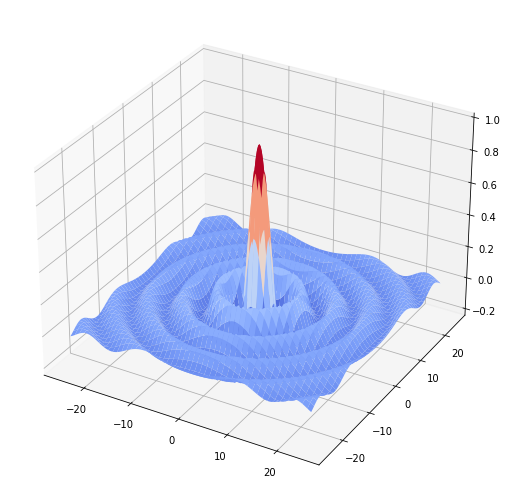

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(16, 9))

surf = ax.plot_surface(xs, ys, zs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

### Implementacja w Plotly

Wykresy są bardzo ładne, ale tą paczkę trzeba zainstalować osobno wpisując polecenie: 
```python
!pip install plotly
```

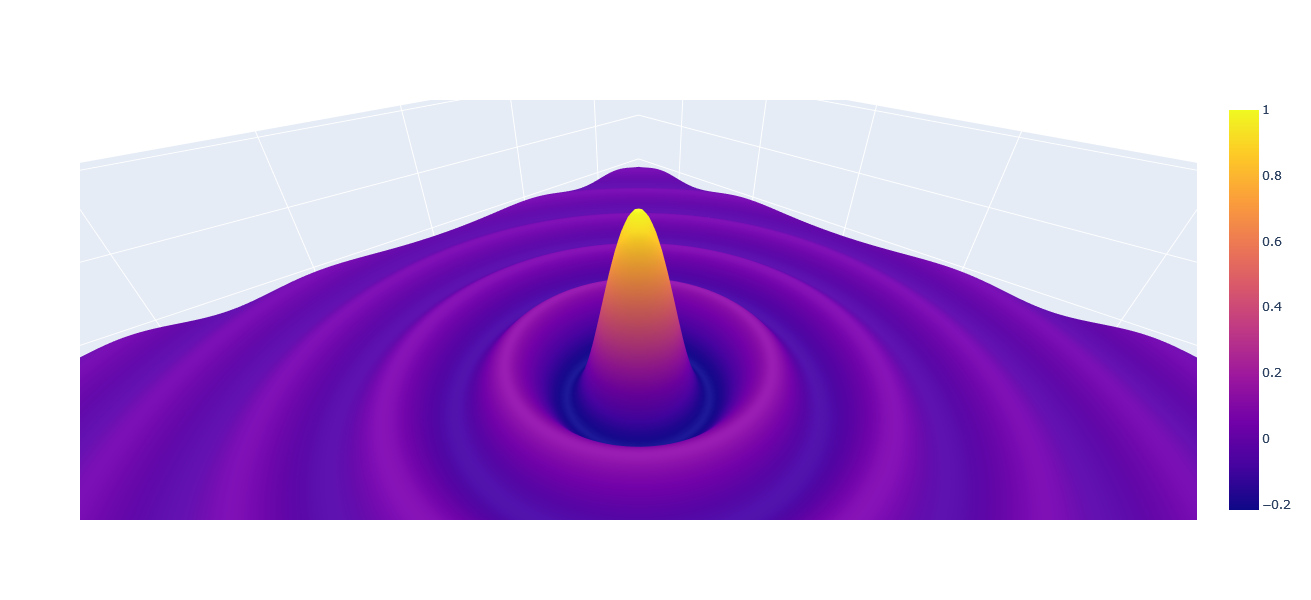

In [6]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=xs, y=ys, z=zs)])

fig.update_layout(width=1000, height=600, scene_aspectmode='manual',
                  scene_aspectratio=dict(x=4, y=4, z=1))